## data: http://ufldl.stanford.edu/housenumbers/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [3]:
import tensorflow as tf

In [4]:
from scipy.io import loadmat
from sklearn.utils import shuffle

In [5]:
def y2indicator(y):
    N = len(y)
    ind = np.zeros((N,10))
    for i in range(N):
        ind[i,y[i]]=1
    return ind

# one-hot coding

In [6]:
def error_rate(p,t):
    return np.mean(p != t)
# p -- predict
# t -- target

In [7]:
def flatten(X):
    N = X.shape[-1]
    flat = np.zeros((N,3072))
    for i in range(N):
        flat[i]=X[:,:,:,i].reshape(3072)
    return flat

In [8]:
train_data = loadmat('../dataset/standford/SVHN/train_32x32.mat')
test_data = loadmat('../dataset/standford/SVHN/test_32x32.mat')

In [9]:
X_train_data = train_data['X']

In [10]:
X_train_data.shape

(32, 32, 3, 73257)

In [11]:
X_train = flatten(train_data['X'].astype(np.float32)/255)

In [12]:
X_train.shape

(73257, 3072)

In [13]:
X_train[0].shape

(3072,)

In [14]:
Y_train = train_data['y'].flatten()-1

In [15]:
Y_train.shape

(73257,)

In [33]:
Y_train

array([0, 8, 1, ..., 0, 5, 8], dtype=uint8)

In [34]:
X_test = flatten(test_data['X'].astype(np.float32)/255)
Y_test = test_data['y'].flatten()-1

In [35]:
X_train, Y_train = shuffle(X_train, Y_train)
Y_train_ind = y2indicator(Y_train)

In [36]:
Y_train_ind

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [37]:
X_train

array([[ 0.67450982,  0.70980394,  0.71764708, ...,  0.61960787,
         0.66666669,  0.65882355],
       [ 0.26274511,  0.27058825,  0.34509805, ...,  0.12156863,
         0.12156863,  0.18431373],
       [ 0.49411765,  0.57254905,  0.42352942, ...,  0.47058824,
         0.56078434,  0.43529412],
       ..., 
       [ 0.04313726,  0.39215687,  0.27058825, ...,  0.09019608,
         0.41176471,  0.29019609],
       [ 0.51372552,  0.59607846,  0.67843139, ...,  0.50588238,
         0.61176473,  0.69411767],
       [ 0.25882354,  0.31764707,  0.32941177, ...,  0.33725491,
         0.3764706 ,  0.42352942]])

In [38]:
Y_test_ind = y2indicator(Y_test)

In [39]:
Y_test_ind

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [40]:
max_iter = 20
print_period = 10
N,D = X_train.shape
batch_size = 500
n_batches = int(N/batch_size)

In [42]:
N,D

(73257, 3072)

In [43]:
int(n_batches)

146

In [46]:
M1 = 1000 
M2 = 500
K = 10

In [47]:
W1_init = np.random.randn(D, M1) / np.sqrt(D + M1)
b1_init = np.zeros(M1)
W2_init = np.random.randn(M1, M2) / np.sqrt(M1 + M2)
b2_init = np.zeros(M2)
W3_init = np.random.randn(M2, K) / np.sqrt(M2 + K)
b3_init = np.zeros(K)

In [48]:
W1_init

array([[-0.00740077, -0.00517876,  0.00292421, ..., -0.00505834,
         0.01603478, -0.01809706],
       [-0.01372592,  0.00791525,  0.02035258, ..., -0.0128859 ,
         0.02888771, -0.00601427],
       [ 0.01973137, -0.01877132,  0.00779793, ..., -0.0165627 ,
         0.01068004,  0.00916939],
       ..., 
       [ 0.01465237, -0.00553073, -0.01041284, ...,  0.0243088 ,
         0.00370055, -0.03664791],
       [ 0.0010985 ,  0.01249007, -0.0285551 , ...,  0.00714638,
         0.00712423, -0.01348605],
       [-0.00481211,  0.01129664, -0.00134175, ...,  0.01069265,
        -0.00995198,  0.01783179]])

In [49]:
X = tf.placeholder(tf.float32, shape=(None, D), name='X')
T = tf.placeholder(tf.float32, shape=(None, K), name='T')
W1 = tf.Variable(W1_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

In [50]:
Z1 = tf.nn.relu( tf.matmul(X, W1) + b1 )
Z2 = tf.nn.relu( tf.matmul(Z1, W2) + b2 )
Yish = tf.matmul(Z2, W3) + b3

In [51]:
cost = tf.reduce_sum(
    tf.nn.softmax_cross_entropy_with_logits(logits=Yish, labels=T))

In [52]:
cost

<tf.Tensor 'Sum:0' shape=() dtype=float32>

In [56]:
train_op = tf.train.RMSPropOptimizer(0.0001, decay=0.99, momentum=0.9).minimize(cost)

    # we'll use this to calculate the error rate
predict_op = tf.argmax(Yish, 1)

t0 = datetime.now()
LL = []
init = tf.global_variables_initializer()

In [57]:
with tf.Session() as session:
    session.run(init)
    
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = X_train[j*batch_size:(j*batch_size + batch_size),]
            Ybatch = Y_train_ind[j*batch_size:(j*batch_size + batch_size),]

            session.run(train_op, feed_dict={X: Xbatch, T: Ybatch})
            if j % print_period == 0:
                test_cost = session.run(cost, feed_dict={X: X_test, T: Y_test_ind})
                prediction = session.run(predict_op, feed_dict={X: X_test})
                err = error_rate(prediction, Y_test)
                print("Cost / err at iteration i=%d, j=%d: %.3f / %.3f" % (i, j, test_cost, err))
                LL.append(test_cost)
print("Elapsed time:", (datetime.now() - t0))

Cost / err at iteration i=0, j=0: 58681.191 / 0.816
Cost / err at iteration i=0, j=10: 58644.582 / 0.804
Cost / err at iteration i=0, j=20: 58295.297 / 0.804
Cost / err at iteration i=0, j=30: 58174.508 / 0.799
Cost / err at iteration i=0, j=40: 58038.820 / 0.798
Cost / err at iteration i=0, j=50: 57641.242 / 0.778
Cost / err at iteration i=0, j=60: 57676.895 / 0.804
Cost / err at iteration i=0, j=70: 56872.680 / 0.773
Cost / err at iteration i=0, j=80: 55829.434 / 0.772
Cost / err at iteration i=0, j=90: 53736.426 / 0.723
Cost / err at iteration i=0, j=100: 51183.363 / 0.683
Cost / err at iteration i=0, j=110: 54632.250 / 0.693
Cost / err at iteration i=0, j=120: 51378.270 / 0.723
Cost / err at iteration i=0, j=130: 47855.258 / 0.644
Cost / err at iteration i=0, j=140: 47351.395 / 0.624
Cost / err at iteration i=1, j=0: 47136.086 / 0.620
Cost / err at iteration i=1, j=10: 43143.523 / 0.584
Cost / err at iteration i=1, j=20: 43221.500 / 0.557
Cost / err at iteration i=1, j=30: 40916.59

Cost / err at iteration i=10, j=40: 22524.105 / 0.252
Cost / err at iteration i=10, j=50: 22221.830 / 0.249
Cost / err at iteration i=10, j=60: 22307.316 / 0.246
Cost / err at iteration i=10, j=70: 22069.266 / 0.244
Cost / err at iteration i=10, j=80: 22221.621 / 0.247
Cost / err at iteration i=10, j=90: 22443.041 / 0.250
Cost / err at iteration i=10, j=100: 23000.256 / 0.257
Cost / err at iteration i=10, j=110: 22336.395 / 0.251
Cost / err at iteration i=10, j=120: 23685.943 / 0.269
Cost / err at iteration i=10, j=130: 22232.156 / 0.248
Cost / err at iteration i=10, j=140: 21469.961 / 0.234
Cost / err at iteration i=11, j=0: 21854.535 / 0.242
Cost / err at iteration i=11, j=10: 22294.562 / 0.249
Cost / err at iteration i=11, j=20: 22087.730 / 0.244
Cost / err at iteration i=11, j=30: 21519.473 / 0.240
Cost / err at iteration i=11, j=40: 21521.676 / 0.235
Cost / err at iteration i=11, j=50: 22410.477 / 0.250
Cost / err at iteration i=11, j=60: 21546.457 / 0.234
Cost / err at iteration 

Elapsed time: 1:11:39.827572

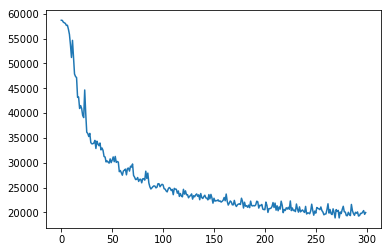

In [58]:
plt.plot(LL)
plt.show()